---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Alejandra Aguilar, Andrés Bonilla, Jhon Gaitán**
- Carné: **B60140, B81220, B73059**
- Grupo: **1/2**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---

---
## 2. - Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

#### Sobre la presentación

El trabajo debe entregarse como un *notebook* de Jupyter nuevo (sin incluir información de este enunciado), en la forma de reporte. La primera parte de las asignaciones debe ser desarrollada por completo y en orden, editando las ecuaciones en $\LaTeX$. La segunda parte debe incluir el código desarrollado y sus resultados. Esto es enviado vía Mediación Virtual, uno por grupo.

---
### Parte 1
#### Hacer la determinación teórica del número  𝑠  de servidores necesarios para cumplir el requisito.

Con los datos suministrados y las ecuaciones, podemos continuar con lo siguiente :
51 para que sea un caso extremo
$$ 
  P(51 \; o \; mas \; personas) = \sum_{i=51}^{\infty} (1 - \rho)\rho^{i}
$$
$$
    P(51 \; o \; mas \; personas) = 1 - \sum_{i=0}^{50} (1 - \rho)\rho^{i}
$$

$$
    P(51 \; o \; mas \; personas) = \rho^{51}  (1)
   \label{eq1}
$$

Y sabemos lo que esta en la siguiente escuacion:
$$
        \rho = \frac{\lambda}{sv} (2)
$$
Y si lo sustuimos queda algo como:
$$
\left({\frac{\lambda}{sv}}\right)^{51}
$$
el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio, por lo tanto, sobra un 5% que se puede cumplir la condicion limite :
$$
 P(51 \; o \; mas \; personas) = \left(\frac{\lambda}{sv}\right)^{51} \leq 0.05
$$
Y lo que nos piden es s, por lo tanto procedemos a despejarlo sabiendo que $$\lambda = 4 \; v = 0.25$$:
$$
 s^{51} \geq \left(\frac{\lambda}{0.05v}\right)^{51}
$$

$$
    s \geq \frac{\lambda}{v} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    s \geq \frac{4}{0.25} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    s \geq 16.96
$$
Con este resultado se aproxima que la cantidad de servidores debería ser 17.

### Parte 2
Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

Cantidad de servidores(s) =  17
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.


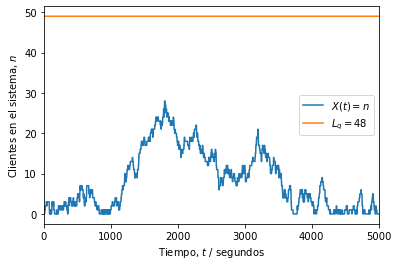

In [16]:
#modificacion del codigo, se copia igual y se hacen algunas modificaciones del parametro "s":
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

#Número de servidores
s = 17 #Este es el parametro que se debe cambiar 

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu)) 
#Hay que multiplicarlo por la cantidad de servidores a utilizar

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Cantidad de servidores(s) = ", str(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Cantidad de servidores(s) =  10
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 86.64%
	 No cumple con la especificación.
Simulación es equivalente a 6.62 horas.


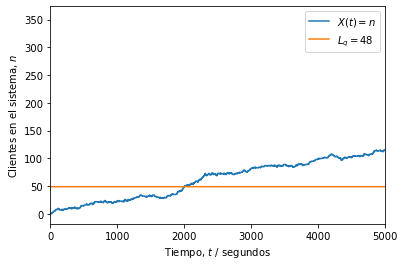

In [17]:
#modificacion del codigo, se copia igual y se hacen algunas modificaciones del parametro "s", en este se intentara 
#que no funcione con un s arbitrario
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

#Número de servidores
s = 10 #Este es el parametro que se debe cambiar 

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu)) 
#Hay que multiplicarlo por la cantidad de servidores a utilizar

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Cantidad de servidores(s) = ", str(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---